# Para identificar los **pools de liquidez y niveles de precios clave**, podemos analizar el **Order Book** y detectar: 

1. **Zonas de alta liquidez** → Donde hay muchas órdenes concentradas (resistencias y soportes).  
2. **Profundidad del mercado** → Entender la cantidad de liquidez en cada nivel de precio.  
3. **Volumen acumulado** → Para detectar precios clave de entrada y salida.  

## **🔹 Estrategia para visualizar los pools de liquidez**
📌 Usaremos Binance API para obtener los datos y analizarlos con **volumen acumulado** y un **histograma de profundidad**.

In [8]:
import requests
import pandas as pd

url = 'https://api.binance.com/api/v3/depth'
params = {'symbol': 'BTCUSDT', 'limit': 5500}  # Tomamos más niveles para mejor análisis

response = requests.get(url, params=params)
order_book = response.json()

# Convertir datos a DataFrame
bids = pd.DataFrame(order_book['bids'], columns=['price', 'volume'], dtype=float)
asks = pd.DataFrame(order_book['asks'], columns=['price', 'volume'], dtype=float)

# Agregar tipo de orden
bids['type'] = 'Bid'
asks['type'] = 'Ask'

# Unimos y ordenamos
order_book_df = pd.concat([bids, asks]).sort_values(by='price')

print(order_book_df.head())

         price   volume type
4999  86191.00  0.00046  Bid
4998  86191.19  0.00013  Bid
4997  86191.59  0.00417  Bid
4996  86191.66  0.00009  Bid
4995  86191.84  0.00028  Bid


In [9]:
# Ordenamos los datos correctamente
bids.sort_values(by="price", ascending=False, inplace=True)  # Compradores (de mayor a menor)
asks.sort_values(by="price", ascending=True, inplace=True)  # Vendedores (de menor a mayor)

# Calculamos volumen acumulado
bids['cumulative_volume'] = bids['volume'].cumsum()
asks['cumulative_volume'] = asks['volume'].cumsum()

# Mostramos los primeros valores
print("Top 10 Bids con volumen acumulado:")
print(bids.head(10))

print("\nTop 10 Asks con volumen acumulado:")
print(asks.head(10))

Top 10 Bids con volumen acumulado:
      price   volume type  cumulative_volume
0  86891.45  0.19191  Bid            0.19191
1  86891.44  0.00040  Bid            0.19231
2  86891.38  0.00006  Bid            0.19237
3  86888.46  0.00048  Bid            0.19285
4  86888.38  0.00007  Bid            0.19292
5  86888.37  0.02360  Bid            0.21652
6  86887.89  0.00006  Bid            0.21658
7  86887.61  0.00010  Bid            0.21668
8  86887.13  0.00272  Bid            0.21940
9  86886.63  0.00006  Bid            0.21946

Top 10 Asks con volumen acumulado:
      price   volume type  cumulative_volume
0  86891.46  7.03702  Ask            7.03702
1  86891.47  0.04081  Ask            7.07783
2  86891.73  0.00014  Ask            7.07797
3  86891.74  0.33947  Ask            7.41744
4  86891.75  1.05887  Ask            8.47631
5  86891.76  0.00007  Ask            8.47638
6  86891.77  0.81721  Ask            9.29359
7  86891.78  0.66764  Ask            9.96123
8  86892.00  0.63359  Ask    

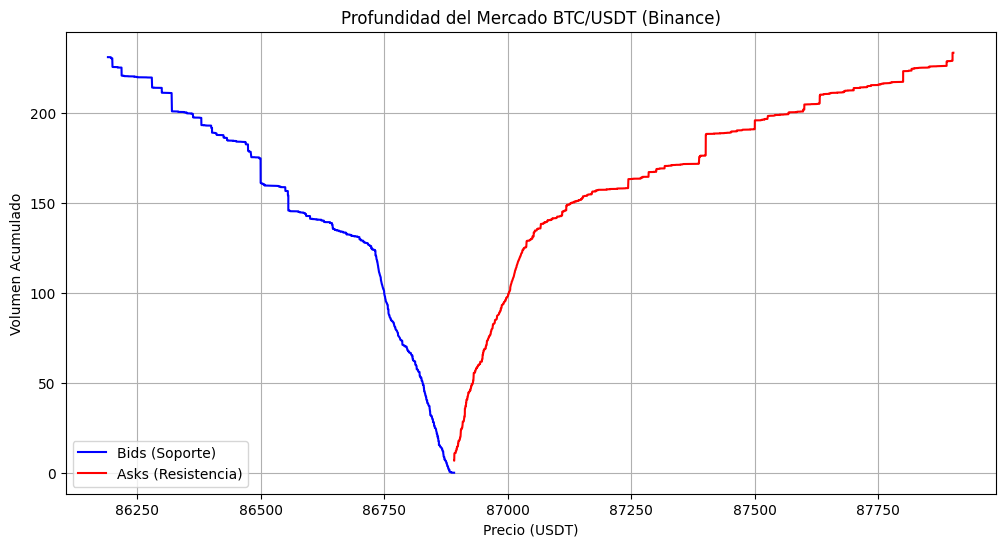

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Gráfico de profundidad
plt.plot(bids["price"], bids["cumulative_volume"], label="Bids (Soporte)", color="blue")
plt.plot(asks["price"], asks["cumulative_volume"], label="Asks (Resistencia)", color="red")

plt.xlabel("Precio (USDT)")
plt.ylabel("Volumen Acumulado")
plt.title("Profundidad del Mercado BTC/USDT (Binance)")
plt.legend()
plt.grid()
plt.show()